Predição do Regressor
Quantidade de instâncias e atributos
(506, 13)

Avaliação utilizando Holdout com 30% para teste
R2 score: 0.73
Mean squared error: 22.75

Avaliação usando Validação Cruzada com 5 folds
R2 scores = [ 0.66117334  0.78523063  0.51645145  0.43640036 -0.33051184]
R2 score médio: 0.41
Mean squared error: 30.92

Árvore Gerada no experimento baseado em Holdout


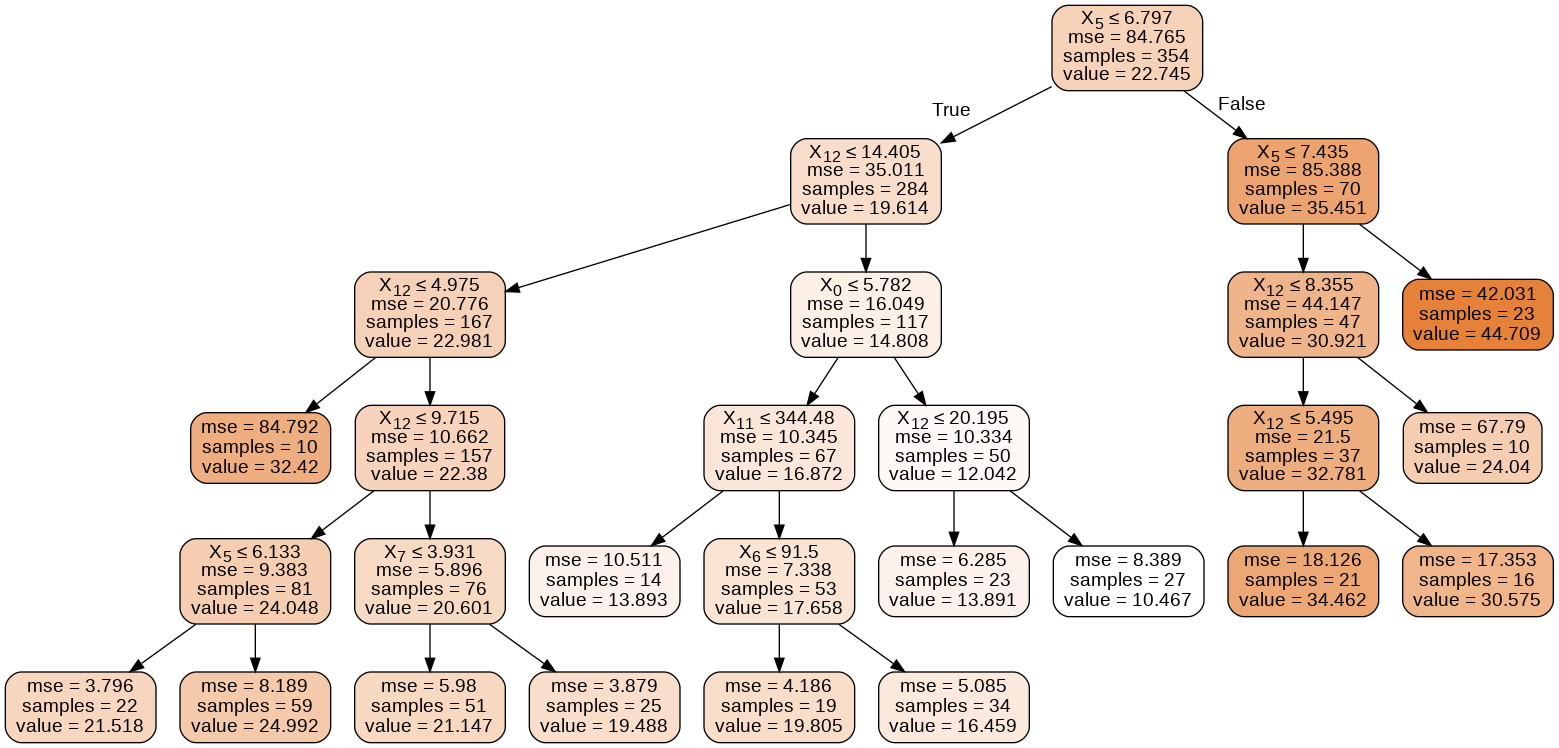

In [2]:
# Este exemplo carrega a base Boston e treina uma árvore de regressão usando
# holdout e outra usando validação cruzada com 3 pastas. 

from sklearn.datasets import load_boston, load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn import  model_selection
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus

# Carrega a base Boston
boston = load_boston()
X, y = boston['data'], boston['target']

print("Predição do Regressor")
print("Quantidade de instâncias e atributos")
print(X.shape)

# Holdout 70% treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0)

# Declara a árvore de regressão
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=30, min_samples_leaf=10, random_state=0)

# Treina a árvore de regressão
regressor.fit(X_train, y_train)
output_prediction = regressor.predict(X_test)

# Imprime os resultados do experimento baseado em holdout
print("\nAvaliação utilizando Holdout com 30% para teste")
print("R2 score: %.2f" % r2_score(y_test, output_prediction))

print("Mean squared error: %.2f" % mean_squared_error(y_test, output_prediction))

# Validação Cruzuzada com 5 folds
#declara uma nova árvore de regressão
regressor1 = DecisionTreeRegressor(max_depth=5, min_samples_split=30, min_samples_leaf=10, random_state=0)

# Treina a árvore de regressão
# define a quantidade de folds ou pastas e executa a validação cruzada
folds=5
result = model_selection.cross_val_score(regressor1, X, y, cv=folds)
output_prediction = model_selection.cross_val_predict(regressor1, X, y, cv=folds)

# Imprime os resultados da validação cruzada
print("\nAvaliação usando Validação Cruzada com %d folds" % folds)
print("R2 scores = " + str(result))
print("R2 score médio: %.2f" % (result.mean()))
print("Mean squared error: %.2f" % mean_squared_error(y, output_prediction))

# Imprime a árvore de regressão gerada
print("\nÁrvore Gerada no experimento baseado em Holdout")
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
im=Image(graph.create_png())
display(im)